In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4 - Distributions

The questions in each lab will be autograded, and all the autograded tests will give you immediate feedback directly in the notebook. This way you can quickly iterate and learn how to create your visualization during the lab time. After you upload your lab on gradescope, the same tests will run again and you will be able to see your score right away.

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

## Visualizing distributions of birds

In this lab we are going to work with a dataset of hawks
that have been captured and measured by researchers.
We will need to do some preprocessing of the data we are going to use,
so you can just follow along in the next cell. In order to better represent EDA processes, some of the tests are hidden.

In [2]:
import pandas as pd


url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/hawks.csv'
hawks = pd.read_csv(
    url
).drop(  # Remove columns that we will not use in this lab
    columns=['Unnamed: 0', 'ReleaseTime', 'StandardTail', 'Tarsus',
             'WingPitFat', 'KeelFat', 'Crop', 'BandNumber', 'CaptureTime',
             'Month', 'Day']
).dropna(
).query(  # Remove a few extreme values to make the charts easier to interpret
    'Hallux < 40 & Species != "RT" & Weight < 1000'
).rename(  # Make all columns start with lower case
    columns=lambda x: x.lower()
)

hawks

,year,species,age,sex,wing,weight,culmen,hallux,tail
3,1992,CH,I,F,265.0,470.0,18.7,23.5,220
4,1992,SS,I,F,205.0,170.0,12.5,14.3,157
28,1992,SS,I,F,205.0,180.0,11.7,15.0,164
40,1993,SS,I,M,171.0,88.0,9.7,11.5,136
52,1993,SS,I,F,202.0,134.0,12.4,13.7,158
...,...,...,...,...,...,...,...,...,...
894,2003,SS,I,F,198.0,190.0,12.2,15.8,158
895,2003,SS,I,F,190.0,200.0,12.7,15.0,157
896,2003,SS,I,F,197.0,185.0,12.8,15.6,157
898,2003,SS,I,F,200.0,185.0,12.8,15.2,158


You can view a short description of the data frame columns in this table:

| Column       | Description                                                                                      |
|--------------|--------------------------------------------------------------------------------------------------|
| year | Year of capture
| species      | CH=Cooper's or SS=Sharp-Shinned                                                       |
| age          | A=Adult or I=Imature                                                                             |
| sex          | F=Female or M=Male                                                                               |
| wing         | Length (in mm) of primary wing feather from tip to wrist it attaches to                          |
| weight       | Body weight (in gm)                                                                              |
| culmen       | Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird |
| hallux       | Length (in mm) of the killing talon                                                              |
| tail         | Measurement (in mm) related to the length of the tail                                            |

In [3]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

Let's start by visualizing the distribution
of the weight of the measured birds
using a histogram.

1. Create a histogram for the weight of all the hawks in the dataset
   using the default number of bins.
2. Write down your main observations from the histogram.
    
</div>

_Points:_ 2

We could see most of the `weights` of all the hawks are in the range of 100-200 gm, with a very few exceptions of above 600 gm, and some other observations in between the range of 300-600 gm

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


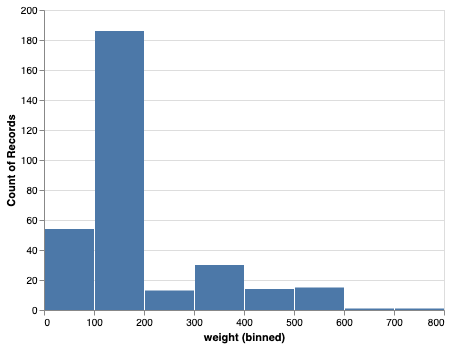

In [4]:
histogram = alt.Chart(hawks).mark_bar().encode(
 x = alt.X('weight:Q', bin=True),
 y = 'count()'
)
# Show the chart
histogram

In [5]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2

<div class="alert alert-info" style="color:black">
    
Let's explore the same distribution with a density plot instead of a histogram.

1. Create a density plot for the distribution of the weight column.
2. What are the main observations you take away from the density plot.
   Are any of them different from the histogram? Why is that?
    
</div>

_Points:_ 4

We notice several peaks of weights, so this could represent that there exists natural groupings with our data, i.e. a group of hawks that satisfies some condition are in this range of values. Hence, this is something that a histogram cannot tell when we dont't specify bins, plus histograms can only tell counts of records of a weight but not its proportion as a whole.

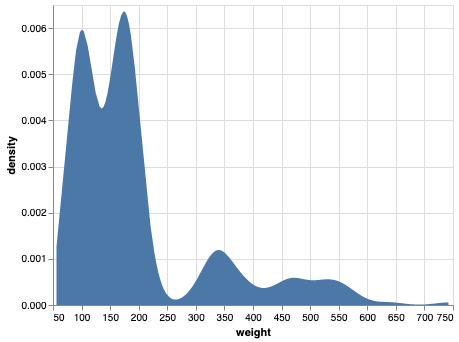

In [6]:
density = alt.Chart(hawks).transform_density(
    'weight',
    as_=['weight', 'density'],
).mark_area().encode(
    x="weight:Q",
    y='density:Q',
)
# Show the plot
density

In [7]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3

<div class="alert alert-info" style="color:black">

Experiment with different number of bins in the histogram from question 1,
until you have a histogram 
that delivers a similar take home message
as the density plot.

</div>

_Points:_ 6

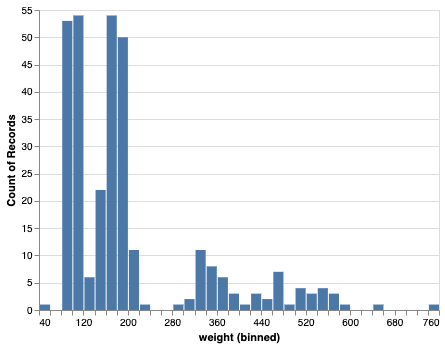

In [8]:
histogram_custom_bins = alt.Chart(hawks).mark_bar().encode(
 x = alt.X('weight:Q', bin=alt.BinParams(maxbins=50)),
 y = 'count()'
)
# Show the plot
histogram_custom_bins

In [9]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4

<div class="alert alert-info" style="color:black">

In our density plot above,
we can see that there are 3-4 peaks in the distribution.
This is often an indication that there are subgroups within our data.
We could possibly identify some of these subgroups
by dividing the data according to its categorical variables.

Explore the data to find a categorical variable that can explain the two major sections in the data,
   one around 50-250 (that has the first two peaks) and one around 250-400 (that has the smaller peaks).
   Use this variable to creat a faceted chart that contains a single column of vertically stacked plots.

</div>

_Points:_ 6

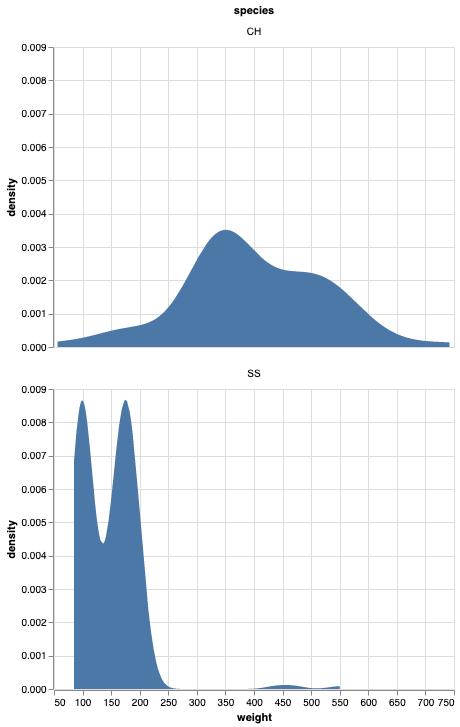

In [10]:
density_facets = alt.Chart(hawks).transform_density(
    'weight',
    groupby=['species'],
    as_=['weight', 'density'],
).mark_area().encode(
    x="weight:Q",
    y='density:Q',
).facet(
    'species',
    columns=1
)
# Show the plot
density_facets

In [11]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

<div class="alert alert-info" style="color:black">

The faceting helped to distinguish the major peaks in the distribution of hawk weights,
but it seems like there are still two small peaks within each of the faceted plots!

Explore the remaining categorical variables by encoding them in the color channel
   and see if you can find one that corresponds to the minor peaks.

</div>

_Points:_ 8

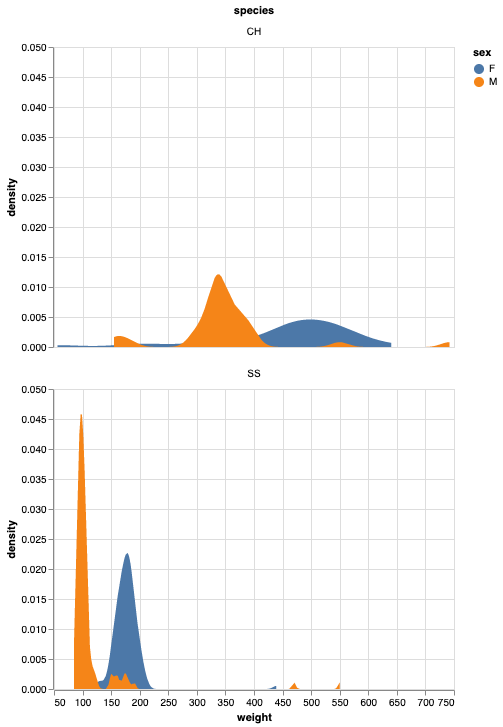

In [12]:
density_facets_color = alt.Chart(hawks).transform_density(
    'weight',
    groupby=['species', "sex"],
    as_=['weight', 'density'],
).mark_area().encode(
    x="weight:Q",
    y='density:Q',
    color = "sex"
).facet(
    'species',
    columns=1
)
# Show the plot
density_facets_color

In [13]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6

<div class="alert alert-info" style="color:black">

1. Create a faceted box plot (in a single column) to compare the same subgroups as in the question above.
2. Write down which advantages and disadvantages does the boxplot has compared to the density plot?

</div>

_Points:_ 6

Compared to the density plot of earlier, the boxplot give us more details, i.e. seeing the quartiles of the data itself, for example the 50% quartile is equivalent to the `median`. Moreover, we could also see `min`, `max`, 25% quartile, 75% quartile and any other outliers beyond this range of the box + its whiskers within group, where each box is a group. So, I could say if you care about what are some majority of data are, boxplot is pretty good (since you also have a ordered axis). On the other hand, the density plot explain us more of statiscal sense of propbability, where we can see the proportion of the whole and not count of records as in histogram, so allows us to study more about the underlying distribution of the data represented

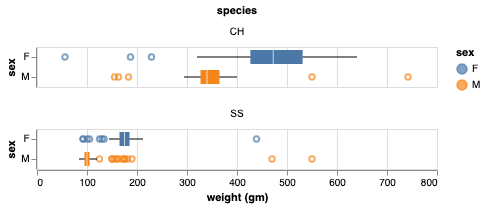

In [14]:
boxplot = alt.Chart(hawks).mark_boxplot().encode(
    x = alt.X("weight", scale=alt.Scale(zero=False, padding=5), title= "weight (gm)"),
    y = "sex:N",
    color = "sex:N"
).facet(
    "species",
    columns = 1
)
boxplot

In [15]:
grader.check("q6")

q6 results: All test cases passed!